In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

**1- Le prétraitement des données**

***Importer les jeux de données***

In [2]:
hosp= pd.read_csv("data/hosp.csv", sep=';')
vaccin= pd.read_csv("data/vaccin.csv", sep=';')
pop= pd.read_excel("data/pop.xlsx", sheet_name= '2021', skiprows= 4)

***Nettoyer les jeux de données***

*Premier dataframe*

In [3]:
df1 = hosp.iloc[:,[0,1,2,3,4]] # Garder quelques variables
df1.rename(columns = {'incid_hosp' : 'hosp', 'incid_rea' : 'rea', 'incid_dc' : 'dc'}, inplace = True)# Renommer les colonnes
df1= df1.loc[hosp.jour != "2021-12-20", ["dep","hosp", "rea", "dc"]].groupby("dep").sum() #Grouper par département et filtrer selon une date précise
df1

/Users/hugocarlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,hosp,rea,dc
dep,,,
01,4054,626,682
02,6107,842,1194
03,3296,369,637
04,1903,148,282
05,1947,284,281
...,...,...,...
972,4271,1121,802
973,5014,717,331
974,3744,934,410


*Deuxième dataframe*

In [4]:
df2 = vaccin.iloc[:,[0,1,5,6,7]] # Garder quelques variables
df2.rename(columns = {'n_cum_dose1': 'dose1' ,'n_cum_complet': 'dose2', 'n_cum_rappel':'dose3' }, inplace = True) #Renommer les colonnes
df2 = df2.loc[df2.jour == "2021-12-19", ["dep", "dose1", "dose2","dose3"]].groupby("dep").sum() #Grouper par département et filtrer selon une date précise
df2

/Users/hugocarlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,dose1,dose2,dose3
dep,,,
01,470048,465296,170191
02,407360,401656,149417
03,264127,261355,113859
04,114823,112422,45487
05,105916,103676,42928
...,...,...,...
91,953488,939823,331192
92,1224674,1212076,480069
93,1071852,1050612,291440


*Troisème dataframe*

In [5]:
df3= pop.iloc[:96,[0,2,3,4,5,6,7]] # Garder quelques variables et s'arreter à la 96ème observation
df3.rename(columns = {'Unnamed: 0' : 'dep', '0 à 19 ans' : 'age_0_19ans', '20 à 39 ans' : 'age_20_39ans', '40 à 59 ans': 'age_40_59ans', '60 à 74 ans': 'age_60_74ans' 
                      , '75 ans et plus': 'age_75_plus', 'Total' : 'pop'}, inplace = True) #Renommer les variables
df3

,dep,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop
0,01,168951.0,151533.0,180119.0,106335.0,55306.0,662244.0
1,02,129348.0,112998.0,134171.0,99937.0,49049.0,525503.0
2,03,66796.0,61054.0,84516.0,72998.0,46381.0,331745.0
3,04,33799.0,30380.0,43459.0,36404.0,21660.0,165702.0
4,05,29287.0,26790.0,37351.0,30045.0,16549.0,140022.0
...,...,...,...,...,...,...,...
91,91,358762.0,337635.0,346627.0,178419.0,94013.0,1315456.0
92,92,399621.0,465827.0,432633.0,215315.0,119704.0,1633100.0
93,93,486120.0,478155.0,424596.0,197804.0,82665.0,1669340.0
94,94,363671.0,398882.0,367290.0,190122.0,98607.0,1418572.0


***Merger les dataframes 1 et 2 sur la colonne dep***


In [6]:
m1 = pd.merge(df1,df2,on='dep', how= 'right')
m1

,hosp,rea,dc,dose1,dose2,dose3
dep,,,,,,
01,4054,626,682,470048,465296,170191
02,6107,842,1194,407360,401656,149417
03,3296,369,637,264127,261355,113859
04,1903,148,282,114823,112422,45487
05,1947,284,281,105916,103676,42928
...,...,...,...,...,...,...
91,13530,2538,2059,953488,939823,331192
92,20574,4700,2962,1224674,1212076,480069
93,19485,3645,2701,1071852,1050612,291440


***Merger les dataframes m1 et df2 sur la colonne dep***


In [7]:
df = pd.merge(m1,df3,on='dep', how= 'left')
df

,dep,hosp,rea,dc,dose1,dose2,dose3,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop
0,01,4054,626,682,470048,465296,170191,168951.0,151533.0,180119.0,106335.0,55306.0,662244.0
1,02,6107,842,1194,407360,401656,149417,129348.0,112998.0,134171.0,99937.0,49049.0,525503.0
2,03,3296,369,637,264127,261355,113859,66796.0,61054.0,84516.0,72998.0,46381.0,331745.0
3,04,1903,148,282,114823,112422,45487,33799.0,30380.0,43459.0,36404.0,21660.0,165702.0
4,05,1947,284,281,105916,103676,42928,29287.0,26790.0,37351.0,30045.0,16549.0,140022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,13530,2538,2059,953488,939823,331192,358762.0,337635.0,346627.0,178419.0,94013.0,1315456.0
92,92,20574,4700,2962,1224674,1212076,480069,399621.0,465827.0,432633.0,215315.0,119704.0,1633100.0
93,93,19485,3645,2701,1071852,1050612,291440,486120.0,478155.0,424596.0,197804.0,82665.0,1669340.0
94,94,20096,3845,3203,1009039,996474,349347,363671.0,398882.0,367290.0,190122.0,98607.0,1418572.0


In [8]:
df.dtypes #types de variables

dep              object
hosp              int64
rea               int64
dc                int64
dose1             int64
dose2             int64
dose3             int64
age_0_19ans     float64
age_20_39ans    float64
age_40_59ans    float64
age_60_74ans    float64
age_75_plus     float64
pop             float64
dtype: object

***Convertir les colonnes en Integer***


In [9]:
df[['age_0_19ans','age_20_39ans','age_40_59ans','age_60_74ans','age_75_plus','pop']] = df[['age_0_19ans','age_20_39ans','age_40_59ans','age_60_74ans','age_75_plus','pop']].apply(pd.to_numeric, downcast='integer')
print(df.dtypes)
print(" ")
df

dep             object
hosp             int64
rea              int64
dc               int64
dose1            int64
dose2            int64
dose3            int64
age_0_19ans      int32
age_20_39ans     int32
age_40_59ans     int32
age_60_74ans     int32
age_75_plus      int32
pop              int32
dtype: object
 


,dep,hosp,rea,dc,dose1,dose2,dose3,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop
0,01,4054,626,682,470048,465296,170191,168951,151533,180119,106335,55306,662244
1,02,6107,842,1194,407360,401656,149417,129348,112998,134171,99937,49049,525503
2,03,3296,369,637,264127,261355,113859,66796,61054,84516,72998,46381,331745
3,04,1903,148,282,114823,112422,45487,33799,30380,43459,36404,21660,165702
4,05,1947,284,281,105916,103676,42928,29287,26790,37351,30045,16549,140022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,13530,2538,2059,953488,939823,331192,358762,337635,346627,178419,94013,1315456
92,92,20574,4700,2962,1224674,1212076,480069,399621,465827,432633,215315,119704,1633100
93,93,19485,3645,2701,1071852,1050612,291440,486120,478155,424596,197804,82665,1669340
94,94,20096,3845,3203,1009039,996474,349347,363671,398882,367290,190122,98607,1418572


In [10]:
df['non_vacc'] = df['pop'] - df['dose1'] #ajouter une nouvelle variable
df

,dep,hosp,rea,dc,dose1,dose2,dose3,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop,non_vacc
0,01,4054,626,682,470048,465296,170191,168951,151533,180119,106335,55306,662244,192196
1,02,6107,842,1194,407360,401656,149417,129348,112998,134171,99937,49049,525503,118143
2,03,3296,369,637,264127,261355,113859,66796,61054,84516,72998,46381,331745,67618
3,04,1903,148,282,114823,112422,45487,33799,30380,43459,36404,21660,165702,50879
4,05,1947,284,281,105916,103676,42928,29287,26790,37351,30045,16549,140022,34106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,13530,2538,2059,953488,939823,331192,358762,337635,346627,178419,94013,1315456,361968
92,92,20574,4700,2962,1224674,1212076,480069,399621,465827,432633,215315,119704,1633100,408426
93,93,19485,3645,2701,1071852,1050612,291440,486120,478155,424596,197804,82665,1669340,597488
94,94,20096,3845,3203,1009039,996474,349347,363671,398882,367290,190122,98607,1418572,409533


In [11]:
df.columns #le nom des differentes colonnes

Index(['dep', 'hosp', 'rea', 'dc', 'dose1', 'dose2', 'dose3', 'age_0_19ans',
       'age_20_39ans', 'age_40_59ans', 'age_60_74ans', 'age_75_plus', 'pop',
       'non_vacc'],
      dtype='object')

In [12]:
df.dtypes

dep             object
hosp             int64
rea              int64
dc               int64
dose1            int64
dose2            int64
dose3            int64
age_0_19ans      int32
age_20_39ans     int32
age_40_59ans     int32
age_60_74ans     int32
age_75_plus      int32
pop              int32
non_vacc         int64
dtype: object

***Création d'une nouvelle base avec le taux d'indicdence***

In [13]:
df["hosp"]= df["hosp"]/df["pop"]*100000
df["rea"]= df["rea"]/df["pop"]*100000
df["dc"]= df["dc"]/df["pop"]*100000
df["dose1"]= df["dose1"]/df["pop"]*100000
df["dose2"]= df["dose2"]/df["pop"]*100000
df["dose3"]= df["dose3"]/df["pop"]*100000
df["age_0_19ans"]= df["age_0_19ans"]/df["pop"]*100000
df["age_20_39ans"]= df["age_20_39ans"]/df["pop"]*100000
df["age_40_59ans"]= df["age_40_59ans"]/df["pop"]*100000
df["age_60_74ans"]= df["age_60_74ans"]/df["pop"]*100000
df["age_75_plus"]= df["age_75_plus"]/df["pop"]*100000
df["non_vacc"]= df["non_vacc"]/df["pop"]*100000
df


,dep,hosp,rea,dc,dose1,dose2,dose3,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop,non_vacc
0,01,612.161077,94.527093,102.983190,70978.068506,70260.508211,25699.138082,25511.895918,22881.747513,27198.283412,16056.770616,8351.302541,662244,29021.931494
1,02,1162.124669,160.227439,227.210882,77518.111219,76432.674980,28433.139297,24614.131603,21502.826815,25531.918942,19017.398569,9333.724070,525503,22481.888781
2,03,993.534190,111.230011,192.014951,79617.477279,78781.895733,34321.240712,20134.742046,18403.894558,25476.194065,22004.250252,13980.919079,331745,20382.522721
3,04,1148.447212,89.316967,170.185031,69294.878758,67845.892023,27451.086891,20397.460501,18334.117874,26227.203051,21969.559812,13071.658761,165702,30705.121242
4,05,1390.495779,202.825270,200.682750,75642.399052,74042.650441,30658.039451,20915.998914,19132.707717,26675.093914,21457.342418,11818.857037,140022,24357.600948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,1028.540673,192.936898,156.523669,72483.458208,71444.654933,25176.972852,27272.824025,25666.764985,26350.330228,13563.281478,7146.799285,1315456,27516.541792
92,92,1259.812626,287.796216,181.372849,74990.753781,74219.337456,29396.179046,24470.087564,28524.095279,26491.519197,13184.434511,7329.863450,1633100,25009.246219
93,93,1167.227767,218.349767,161.800472,64208.130159,62935.771023,17458.396732,29120.490733,28643.356057,25434.962320,11849.233829,4951.957061,1669340,35791.869841
94,94,1416.635885,271.047222,225.790443,71130.615859,70244.865964,24626.666817,25636.414648,28118.558663,25891.530356,13402.351097,6951.145236,1418572,28869.384141


***Ordonner les colonnes***

In [14]:
new_order = [0,1,2,3,4,5,6,13,7,8,9,10,11,12]
df = df[df.columns[new_order]]
df

,dep,hosp,rea,dc,dose1,dose2,dose3,non_vacc,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop
0,01,612.161077,94.527093,102.983190,70978.068506,70260.508211,25699.138082,29021.931494,25511.895918,22881.747513,27198.283412,16056.770616,8351.302541,662244
1,02,1162.124669,160.227439,227.210882,77518.111219,76432.674980,28433.139297,22481.888781,24614.131603,21502.826815,25531.918942,19017.398569,9333.724070,525503
2,03,993.534190,111.230011,192.014951,79617.477279,78781.895733,34321.240712,20382.522721,20134.742046,18403.894558,25476.194065,22004.250252,13980.919079,331745
3,04,1148.447212,89.316967,170.185031,69294.878758,67845.892023,27451.086891,30705.121242,20397.460501,18334.117874,26227.203051,21969.559812,13071.658761,165702
4,05,1390.495779,202.825270,200.682750,75642.399052,74042.650441,30658.039451,24357.600948,20915.998914,19132.707717,26675.093914,21457.342418,11818.857037,140022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,1028.540673,192.936898,156.523669,72483.458208,71444.654933,25176.972852,27516.541792,27272.824025,25666.764985,26350.330228,13563.281478,7146.799285,1315456
92,92,1259.812626,287.796216,181.372849,74990.753781,74219.337456,29396.179046,25009.246219,24470.087564,28524.095279,26491.519197,13184.434511,7329.863450,1633100
93,93,1167.227767,218.349767,161.800472,64208.130159,62935.771023,17458.396732,35791.869841,29120.490733,28643.356057,25434.962320,11849.233829,4951.957061,1669340
94,94,1416.635885,271.047222,225.790443,71130.615859,70244.865964,24626.666817,28869.384141,25636.414648,28118.558663,25891.530356,13402.351097,6951.145236,1418572


In [15]:
#df.loc[:,"age_0_19ans"	,"age_20_39ans",	"age_40_59ans",	"age_60_74ans",	"age_75_plus"].groupby("pop").sum()

In [16]:
var2= ["age_0_19ans","age_20_39ans","age_40_59ans","age_60_74ans","age_75_plus"] #Créer des listes de variables
var3= [df3.age_0_19ans,df3.age_20_39ans,df3.age_40_59ans,df3.age_60_74ans,df3.age_75_plus]

***Création d'un datframe en sommant la population par tranche d'âges***

In [17]:
sum1 = np.sum(var3, axis=1)
sum_1 = pd.DataFrame(sum1,index = [var2], columns = ['Population'])
sum_1 = sum_1.rename_axis('Tranche d age').reset_index()
sum = sum_1.sort_values('Population',ascending=False).reset_index()
sum

,index,Tranche d age,Population
0,2,age_40_59ans,16832586.0
1,0,age_0_19ans,15429442.0
2,1,age_20_39ans,15309022.0
3,3,age_60_74ans,11383843.0
4,4,age_75_plus,6280950.0


***Présenter le datframe sur un barplot***

Text(0.5, 1.0, '         Effectifs et fréquences de la population par tranche d age')

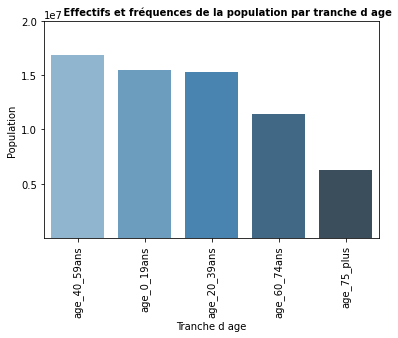

In [18]:
sb.barplot( data=sum_1, x= "Tranche d age", y='Population', palette="Blues_d", order=sum['Tranche d age'])
plt.yticks([5000000, 10000000, 15000000, 20000000])
plt.xticks(rotation='vertical')
plt.title('         Effectifs et fréquences de la population par tranche d age', fontsize=10, weight='bold')



***Création d'un dataframe des individus vaccinés contre le Covid-19***

In [19]:
var4= ["dose1","dose2","dose3","non_vacc"]
var5= [df2.dose1,df2.dose2,df2.dose3,df.non_vacc]

In [20]:
sum2 = np.sum(var5, axis=1)
sum_2 = pd.DataFrame(sum2,index = [var4], columns = ['Population'])
sum_2 = sum_2.rename_axis('Vaccination').reset_index()
sum_2

,Vaccination,Population
0,dose1,4.965065e+07
1,dose2,4.897017e+07
2,dose3,1.880170e+07
3,non_vacc,2.244549e+06


***Représenter les résultat sur un barplot***

Text(0.5, 1.0, '       La vacccination contre le Covid-19')

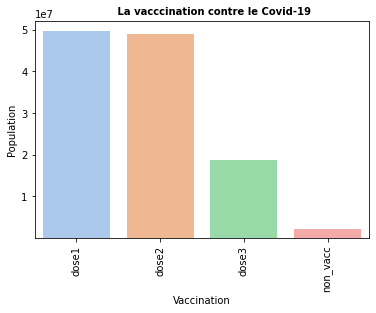

In [21]:
sb.barplot( data=sum_2, x= "Vaccination", y='Population', palette="pastel")
plt.yticks([10000000, 20000000, 30000000, 40000000,50000000])
plt.xticks(rotation='vertical')
plt.title('       La vacccination contre le Covid-19', fontsize=10, weight='bold')

In [22]:
#plot = sum_2.plot.pie(y='Population', figsize=(5, 5), labels= [" 1 dose", "2 doses", "3 doses", "Non vaccinées"], autopct='%1.1f%%',shadow=True)

***Création d'un dataframe des individus ayant subis des complications***

In [23]:
var6 = ["hosp","rea","dc"]
var7 = [df1.hosp,df1.rea,df1.dc]

In [24]:
sum3 = np.sum(var7, axis=1)
sum_3 = pd.DataFrame(sum3,index = [var6], columns = ['cas'])
sum_3=sum_3.rename_axis('complications').reset_index()
sum_3 = sum_3.replace({"hosp":"Hospitalisations" , "area": "Réanimations", "dc":"Décés"})
sum_3

,complications,cas
0,Hospitalisations,584729
1,rea,108574
2,Décés,95731


***Représenter les résultats sur un barplot***

Text(0.5, 1.0, '       Les individus ayant subis des complications ')

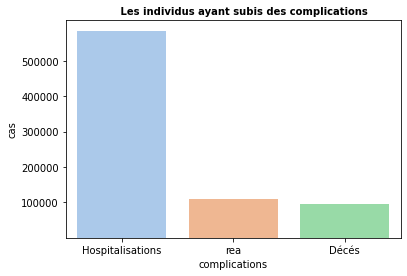

In [25]:
sb.barplot( data=sum_3, x= "complications", y='cas', palette="pastel")
plt.yticks([100000, 200000, 300000, 400000,500000])
plt.title('       Les individus ayant subis des complications ', fontsize=10, weight='bold')

In [26]:
df #Visualiser le dataframe final

,dep,hosp,rea,dc,dose1,dose2,dose3,non_vacc,age_0_19ans,age_20_39ans,age_40_59ans,age_60_74ans,age_75_plus,pop
0,01,612.161077,94.527093,102.983190,70978.068506,70260.508211,25699.138082,29021.931494,25511.895918,22881.747513,27198.283412,16056.770616,8351.302541,662244
1,02,1162.124669,160.227439,227.210882,77518.111219,76432.674980,28433.139297,22481.888781,24614.131603,21502.826815,25531.918942,19017.398569,9333.724070,525503
2,03,993.534190,111.230011,192.014951,79617.477279,78781.895733,34321.240712,20382.522721,20134.742046,18403.894558,25476.194065,22004.250252,13980.919079,331745
3,04,1148.447212,89.316967,170.185031,69294.878758,67845.892023,27451.086891,30705.121242,20397.460501,18334.117874,26227.203051,21969.559812,13071.658761,165702
4,05,1390.495779,202.825270,200.682750,75642.399052,74042.650441,30658.039451,24357.600948,20915.998914,19132.707717,26675.093914,21457.342418,11818.857037,140022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,1028.540673,192.936898,156.523669,72483.458208,71444.654933,25176.972852,27516.541792,27272.824025,25666.764985,26350.330228,13563.281478,7146.799285,1315456
92,92,1259.812626,287.796216,181.372849,74990.753781,74219.337456,29396.179046,25009.246219,24470.087564,28524.095279,26491.519197,13184.434511,7329.863450,1633100
93,93,1167.227767,218.349767,161.800472,64208.130159,62935.771023,17458.396732,35791.869841,29120.490733,28643.356057,25434.962320,11849.233829,4951.957061,1669340
94,94,1416.635885,271.047222,225.790443,71130.615859,70244.865964,24626.666817,28869.384141,25636.414648,28118.558663,25891.530356,13402.351097,6951.145236,1418572


In [27]:
df.dtypes # Le type des variables

dep              object
hosp            float64
rea             float64
dc              float64
dose1           float64
dose2           float64
dose3           float64
non_vacc        float64
age_0_19ans     float64
age_20_39ans    float64
age_40_59ans    float64
age_60_74ans    float64
age_75_plus     float64
pop               int32
dtype: object